In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
dfuji = pd.read_csv("Mypertamina_dataset_fix.csv")




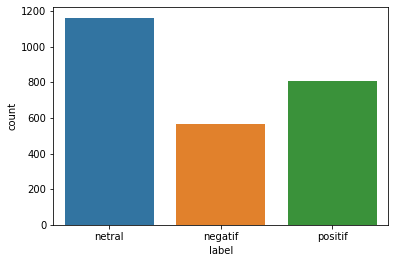

In [ ]:
import seaborn as sns
sns.countplot(x="label", data=dfuji,)

In [ ]:
dfuji.info


<bound method DataFrame.info of       Unnamed: 0          pubdate           author  \
0              0  6/28/2022 23:02         asli3in1   
1              1  6/28/2022 23:02   marshaclarisah   
2              2  6/28/2022 23:02         mohtahid   
3              3  6/28/2022 23:02     GantarGiwang   
4              4  6/28/2022 23:02     aris_apuesto   
...          ...              ...              ...   
2530        2530   6/28/2022 5:34  yofinapriliariz   
2531        2531   6/28/2022 5:34         tech4lyv   
2532        2532   6/28/2022 5:33       MatKlowor2   
2533        2533   6/28/2022 5:33        tormrhone   
2534        2534   6/28/2022 5:33     hariankompas   

                                                  title    label  \
0     RT @glrhn: Pertamina: Dilarang menggunakan tel...   netral   
1     RT @small_MOFO: kontol, lu bikin mypertamina c...  negatif   
2     RT @B_dzoel: Beli BBM make Apk MyPertamina 🙄 L...   netral   
3     RT @msaid_didu: Berharap @pertamina mengh

In [ ]:
dfuji.dropna()

,Unnamed: 0,pubdate,author,title,label,Teksbersih
0,0,6/28/2022 23:02,asli3in1,RT @glrhn: Pertamina: Dilarang menggunakan tel...,netral,pertamina larang telepon seluler isi bahan bak...
1,1,6/28/2022 23:02,marshaclarisah,"RT @small_MOFO: kontol, lu bikin mypertamina c...",negatif,kontol lu bikin mypertamina cuman buang duit y...
2,2,6/28/2022 23:02,mohtahid,RT @B_dzoel: Beli BBM make Apk MyPertamina 🙄 L...,netral,beli bbm make apk mypertamina ituh apk nempeli...
3,3,6/28/2022 23:02,GantarGiwang,RT @msaid_didu: Berharap @pertamina menghentik...,positif,harap henti mekanisme beli bbm subsidi daftar ...
4,4,6/28/2022 23:02,aris_apuesto,RT @Hasbil_Lbs: Jadi selama ini kita dibohongi...,netral,bohong main hp pom bensin dewan
...,...,...,...,...,...,...
2530,2530,6/28/2022 5:34,yofinapriliariz,"Udah mulai ga nyaman nih tempat kerjanya, bism...",positif,udah ga nyaman nih kerja bismillah direktur pe...
2531,2531,6/28/2022 5:34,tech4lyv,@AREAJULID pake my pertamina tapi sistemnya ng...,netral,pake my pertamina sistem ngelag ga responsif t...
2532,2532,6/28/2022 5:33,MatKlowor2,"Wah makin dibikin susah, mau beli minyak goren...",negatif,bikin susah beli minyak goreng hrs pakai pedul...
2533,2533,6/28/2022 5:33,tormrhone,@yulianasari_y @glrhn Makanya banyak kilang pe...,positif,kilang pertamina leduk atur sesuai hendak


In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.4 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#simpan kata-kata stopword

f = open("stopword_list_tala.txt", "r")
isi = f.read()

tempStoplist = []
for tempstp in isi.split():
  tempStoplist.append(tempstp.lower())

In [ ]:
cleantext = "(@[A-Za-z0-9_-]+)|([^A-Za-z \t\n])|(\w+:\/\/\S+)|(x[A-Za-z0-9]+)|(X[A-Za-z0-9]+)" #regex untuk remove punctuation

def preprocessing(teks):
  teks = teks.rstrip("\n")
  teks = re.sub(r'^https?:\/\/.*[\r\n]*', '', teks, flags=re.MULTILINE)
  teks = re.sub(cleantext,' ',str(teks).lower()).strip() #casefolding dan remove punctuation
 # teks = re.sub(r'[0-9]+', '', teks, flags=re.MULTILINE)
  tokens = []
  for token in teks.split():
    #if token in templist:
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      token = stemmer.stem(token) #lakukan stemming
      if len(token) >= 2:
     #if token != 'b':
       if token != 'rt':
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
dfuji['Teksbersih'] = dfuji.title.apply(lambda x:preprocessing(x))
dfuji.head()

,Unnamed: 0,pubdate,author,title,label,Teksbersih
0,0,6/28/2022 23:02,asli3in1,RT @glrhn: Pertamina: Dilarang menggunakan tel...,netral,pertamina larang telepon seluler isi bahan bak...
1,1,6/28/2022 23:02,marshaclarisah,"RT @small_MOFO: kontol, lu bikin mypertamina c...",negatif,kontol lu bikin mypertamina cuman buang duit y...
2,2,6/28/2022 23:02,mohtahid,RT @B_dzoel: Beli BBM make Apk MyPertamina 🙄 L...,netral,beli bbm make apk mypertamina ituh apk nempeli...
3,3,6/28/2022 23:02,GantarGiwang,RT @msaid_didu: Berharap @pertamina menghentik...,positif,harap henti mekanisme beli bbm subsidi daftar ...
4,4,6/28/2022 23:02,aris_apuesto,RT @Hasbil_Lbs: Jadi selama ini kita dibohongi...,netral,bohong main hp pom bensin dewan


In [ ]:
# dfuji.drop(['Teksbersih'],inplace=True,axis=1)
# dfuji.head()

In [ ]:
dfuji.to_csv('Mypertamina_dataset_fix2.csv')

In [ ]:
label_train = dfuji['label'].to_numpy()
fitur_train = dfuji[['author','Teksbersih']]

print(fitur_train)

               author                                         Teksbersih
0            asli3in1  pertamina larang telepon seluler isi bahan bak...
1      marshaclarisah  kontol lu bikin mypertamina cuman buang duit y...
2            mohtahid  beli bbm make apk mypertamina ituh apk nempeli...
3        GantarGiwang  harap henti mekanisme beli bbm subsidi daftar ...
4        aris_apuesto                    bohong main hp pom bensin dewan
...               ...                                                ...
2530  yofinapriliariz  udah ga nyaman nih kerja bismillah direktur pe...
2531         tech4lyv  pake my pertamina sistem ngelag ga responsif t...
2532       MatKlowor2  bikin susah beli minyak goreng hrs pakai pedul...
2533        tormrhone          kilang pertamina leduk atur sesuai hendak
2534     hariankompas  siar situs pertamina buka juli masyarakat hak ...

[2535 rows x 2 columns]


In [ ]:
y = dfuji['label']
x = dfuji['Teksbersih']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.feature_extraction.text  import  CountVectorizer

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(x)


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=2)

In [ ]:
x_train.shape

(2028, 5094)

In [ ]:
x_test.shape

(507, 5094)

In [ ]:
y_train.shape

(2028,)

In [ ]:
y_test.shape

(507,)

In [ ]:
print (y_test)

***SVM***


In [ ]:
from sklearn import svm
from  sklearn.svm  import  SVC
clf_liner = svm.SVC(kernel='linear', C=1.8, random_state=100)
clf_rbf = svm.SVC(kernel='rbf', C=1.8, random_state=100)
clf_sigmoid = svm.SVC(kernel='sigmoid', C=1.8, random_state=100)
clf_poly = svm.SVC(kernel='poly', C=1.8, random_state=100)

In [ ]:
clf_liner.fit(x_train,y_train)
clf_rbf.fit(x_train,y_train)
clf_sigmoid.fit(x_train,y_train)
clf_poly.fit(x_train,y_train)

SVC(C=1.8, kernel='poly', random_state=100)

In [ ]:
y_clf_linear = clf_liner.predict(x_test)
y_clf_rbf = clf_rbf.predict(x_test)
y_clf_sigmoid = clf_sigmoid.predict(x_test)
y_clf_poly = clf_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("evaluasi linear ", classification_report(y_test, y_clf_linear),"\n")
print("evaluasi rbf ", classification_report(y_test, y_clf_rbf),"\n")
print("evaluasi sigmoid ", classification_report(y_test, y_clf_sigmoid),"\n")
print("evaluasi poly ", classification_report(y_test, y_clf_poly))

evaluasi linear                precision    recall  f1-score   support

     negatif       0.67      0.50      0.57       106
      netral       0.68      0.83      0.74       242
     positif       0.82      0.69      0.75       159

    accuracy                           0.71       507
   macro avg       0.72      0.67      0.69       507
weighted avg       0.72      0.71      0.71       507
 

evaluasi rbf                precision    recall  f1-score   support

     negatif       0.70      0.43      0.53       106
      netral       0.66      0.86      0.75       242
     positif       0.83      0.65      0.73       159

    accuracy                           0.71       507
   macro avg       0.73      0.65      0.67       507
weighted avg       0.72      0.71      0.70       507
 

evaluasi sigmoid                precision    recall  f1-score   support

     negatif       0.63      0.48      0.55       106
      netral       0.68      0.81      0.74       242
     positif       0.8

In [ ]:
from sklearn.metrics import accuracy_score
x  =  vectorizer.fit_transform(dfuji.Teksbersih.values)
y  =  dfuji.label.values

svc  =  SVC()
clfr  =  svm.SVC(kernel='sigmoid',  C=1.1 ,random_state=10)

svc.fit(x_train,  y_train)
clfr.fit(x_train,  y_train)

svc_prediction  =  svc.predict(x_test)
clfrpred  =  clfr.predict(x_test)
svc_accuracy  =  accuracy_score(y_test,svc_prediction)
clfrakr  =  accuracy_score(y_test,  clfrpred)
print("Training  accuracy  Score	:  ",clfr.score(x_train,y_train))
print("Vallidation  accuracy  Score	:  ",clfrakr  )
print(classification_report(clfrpred,y_test))

Training  accuracy  Score	:   0.8392504930966469
Vallidation  accuracy  Score	:   0.7100591715976331
              precision    recall  f1-score   support

     negatif       0.46      0.66      0.54        74
      netral       0.86      0.67      0.75       310
     positif       0.65      0.84      0.73       123

    accuracy                           0.71       507
   macro avg       0.66      0.72      0.68       507
weighted avg       0.75      0.71      0.72       507



In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


In [ ]:
conf = metrics.accuracy_score(y_test,y_clf_sigmoid)
conf


0.7061143984220908

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
import matplotlib.pyplot as plt
import itertools

TypeError: ignored

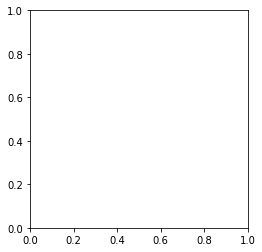

In [ ]:
classes = [0,1,2]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

**WordCloud**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
hatred_words = ' '.join(dfuji[dfuji.label == "negatif"].Teksbersih.values)
non_hatred_words = ' '.join(dfuji[dfuji.label == "positif"].Teksbersih.values)
netral = ' '.join(dfuji[dfuji.label == "netral"].Teksbersih.values)

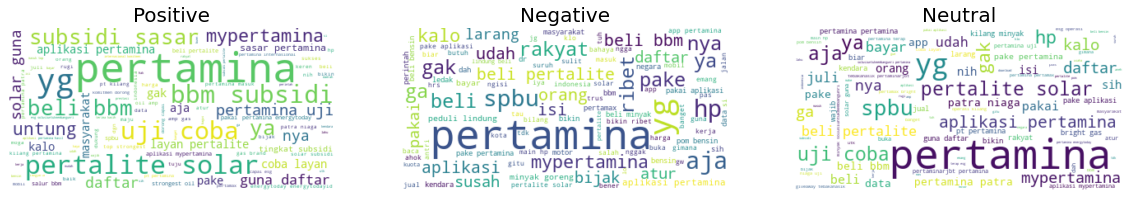

In [ ]:
plt.figure(figsize=(20, 8))

cloud1 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(non_hatred_words)
plt.subplot(131)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Positive', size=20)

cloud2 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(hatred_words)
plt.subplot(132)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Negative', size=20)

cloud3 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(netral)
plt.subplot(133)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.title('Neutral', size=20)

plt.show()

***Data pred***

In [ ]:
dfpred =  pd.read_csv("datapred.csv")
dfpred.head()

In [ ]:
dfpred.info()

In [ ]:
dfpred['teksbersih'] = dfpred.Text.apply(lambda x:preprocessing(x))
dfpred.head()

In [ ]:
xpred = dfpred['teksbersih']
pred = vectorizer.transform(xpred)
dfpred['labelhasil']=clf_liner.predict(pred)

In [ ]:
import seaborn as sns
sns.countplot(x="labelhasil", data=dfpred)

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, figsize=(3,5), sharey=True)
fig.suptitle('Prediction of Sentiment')
sns.countplot(x="labelhasil", data=dfpred)
axs.set_title("TFIDF - SVM")

In [ ]:
dfpred.to_csv('prediksi.csv',encoding='utf-8')

In [ ]:
dfbaru = pd.read_csv("prediksi.csv",index_col=[0])
dfbaru.head()

In [ ]:
dfbaru.info()

In [ ]:
y = dfbaru['labelhasil']
X = dfbaru['teksbersih']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.feature_extraction.text  import  CountVectorizer

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(xpred)


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn import svm
from  sklearn.svm  import  SVC

clf_liner = svm.SVC(kernel='linear', C=1.5, random_state=42)
clf_rbf = svm.SVC(kernel='rbf', C=1.5, random_state=42)
clf_sigmoid = svm.SVC(kernel='sigmoid', C=1.5, random_state=42)
clf_poly = svm.SVC(kernel='poly', C=1.5, random_state=42)

In [ ]:
clf_liner.fit(x_train,y_train)
clf_rbf.fit(x_train,y_train)
clf_sigmoid.fit(x_train,y_train)
clf_poly.fit(x_train,y_train)

In [ ]:
y_clf_linear = clf_liner.predict(x_test)
y_clf_rbf = clf_rbf.predict(x_test)
y_clf_sigmoid = clf_sigmoid.predict(x_test)
y_clf_poly = clf_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("evaluasi linear ", classification_report(y_test, y_clf_linear),"\n")
print("evaluasi rbf ", classification_report(y_test, y_clf_rbf),"\n")
print("evaluasi sigmoid ", classification_report(y_test, y_clf_sigmoid),"\n")
print("evaluasi poly ", classification_report(y_test, y_clf_poly))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
x  =  vectorizer.fit_transform(dfuji.Teksbersih.values)
y  =  dfpred.labelhasil.values

svc  =  SVC()
clfr  =  svm.SVC(kernel='rbf',  C=1.5,  random_state=42)

svc.fit(x_train,  y_train)
clfr.fit(x_train,  y_train)

svc_prediction  =  svc.predict(x_test)
clfrpred  =  clfr.predict(x_test)
svc_accuracy  =  accuracy_score(y_test,svc_prediction)
clfrakr  =  accuracy_score(y_test,  clfrpred)
print("Training  accuracy  Score	:  ",clfr.score(x_train,y_train))
print("Validation  accuracy  Score	:  ",clfrakr  )
print(classification_report(clfrpred,y_test))


**Word Cloud**

In [ ]:
hatred_words = ' '.join(dfpred[dfpred.labelhasil == "negatif"].teksbersih.values)
non_hatred_words = ' '.join(dfpred[dfpred.labelhasil == "positif"].teksbersih.values)
netral = ' '.join(dfpred[dfpred.labelhasil == "netral"].teksbersih.values)

In [ ]:
plt.figure(figsize=(20, 8))

cloud1 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(non_hatred_words)
plt.subplot(131)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Positive', size=20)

cloud2 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(hatred_words)
plt.subplot(132)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Negative', size=20)

cloud3 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(netral)
plt.subplot(133)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.title('Neutral', size=20)

plt.show()

In [ ]:
h = .02

In [ ]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [ ]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


In [ ]:
clf_liner = svm.SVC(kernel='linear', C=1.5, random_state=42)
clf_rbf = svm.SVC(kernel='rbf', C=1.5, random_state=42)
clf_sigmoid = svm.SVC(kernel='sigmoid', C=1.5, random_state=42)
clf_poly = svm.SVC(kernel='poly', C=1.5, random_state=42)

ValueError: ignored

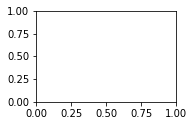

In [ ]:
for i, clf in enumerate((clf_liner,clf_rbf , clf_sigmoid, clf_poly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()